In [1]:
import xarray as xr

In [2]:
var="t"
level=300
PCA_xr = xr.open_dataset("../data/PCAs/era5_{var}_{level}_PCA.nc")
PC_time_series = PCA_xr.time_series.values

In [9]:
ls ../data/era5/*1991*

../data/era5/E5pl00_1M_1991_130_lt_global_5.nc
../data/era5/E5pl00_1M_1991_130_lt.nc
../data/era5/E5pl00_1M_1991_130_ut.nc
../data/era5/E5pl00_1M_1991_133_lt_global_5.nc
../data/era5/E5pl00_1M_1991_133_lt.nc
../data/era5/E5sf00_1M_1991_034_global_5.nc
../data/era5/E5sf00_1M_1991_034.nc


In [17]:
predictors = xr.open_mfdataset("../data/era5/E5pl00_1M_????_130_lt_global_5.nc")
predictors["q"] = xr.open_mfdataset("../data/era5/E5pl00_1M_????_133_lt_global_5.nc").q
predictors["sst"] = xr.open_mfdataset("../data/era5/E5sf00_1M_????_034_global_5.nc").sst

In [13]:
lt_t_xr

<xarray.Dataset>
Dimensions:        (time: 996, lon: 72, lat: 36, isobaricInhPa: 4)
Coordinates:
  * time           (time) datetime64[ns] 1940-01-01T12:00:00 ... 2022-12-01T1...
  * lon            (lon) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * lat            (lat) float64 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 925.0 850.0 700.0
Data variables:
    t              (time, isobaricInhPa, lat, lon) float32 dask.array<chunksize=(12, 4, 36, 72), meta=np.ndarray>
Attributes:
    CDI:                     Climate Data Interface version 2.1.1 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Mon May 27 11:55:45 2024: cdo -O -s -remapdis,gl...
    CDO:                     Climate Data Operators version 2.1.1 (https://mp...

In [15]:
SST = xr.open_dataset("../data/HadSST.4.0.1.0_median.nc").sel(time=slice('1940-01-01T12:00:00.000000000','2022-12-31T12:00:00.000000000'))
SST_tropics = SST.sel(latitude=slice(-20,20))

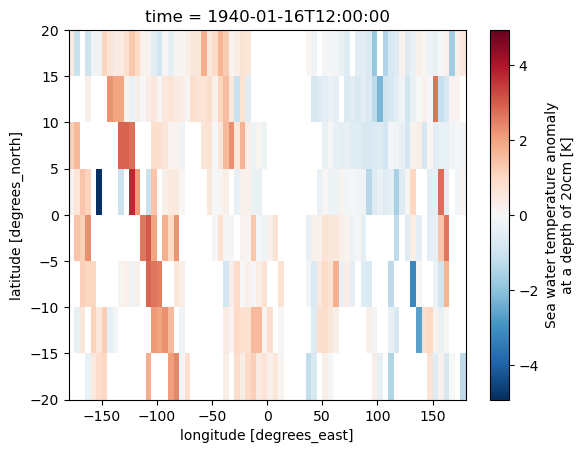

In [19]:
SST_tropics.isel(time=0).tos.plot(x="longitude", y="latitude")

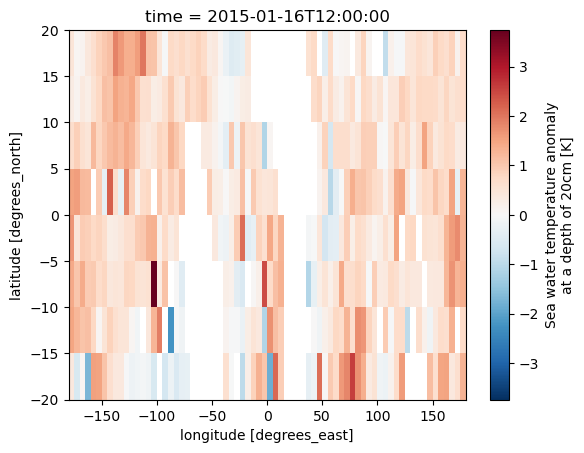

In [18]:
SST_tropics.isel(time=900).tos.plot(x="longitude", y="latitude")